In [1]:
from mflex.model.plasma_parameters import (
    deltaden,
    deltaden_low,
    deltapres,
    deltapres_low,
)
from mflex.model.field.bfield_model import (
    magnetic_field,
    magnetic_field_hypergeo,
    magnetic_field_low,
)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mflex.simulate.simulate_boundary import dipole

In [2]:
xmin = 0.0
ymin = 0.0
zmin = 0.0
xmax = 2.0
ymax = 2.0
zmax = 2.0

nresol_x = 200
nresol_y = 200
nresol_z = 400
nf_max = 200

pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02

length_scale = 1.0
length_scale_x = 1.0 * nresol_x * float(pixelsize_x)
length_scale_y = 1.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

In [3]:
data_bz = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

In [4]:
# Height profile f parameters
a = 0.44
alpha = 0.25
b = 1.0

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.02
a_low = a * (1 - np.tanh(-z0_b / deltaz_b))
kappa = 1.0 / z0_b

mfield_hyp, dmfield_hyp = magnetic_field_hypergeo(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    length_scale,
)
mfield_asymp, dmfield_asymp = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    length_scale,
)

mfield_low, dmfield_low = magnetic_field_low(
    data_bz,
    z0_b,
    kappa,
    a_low,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    length_scale,
)

length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 2.0
length scale 2.0
length scale x 4.0
length scale y 4.0
length scale x norm 2.0
length scale y norm 2.0


In [5]:
dpres_hyp = np.zeros((nresol_y, nresol_x, nresol_z))
dpres_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
dpres_low = np.zeros((nresol_y, nresol_x, nresol_z))

dden_hyp = np.zeros((nresol_y, nresol_x, nresol_z))
dden_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
dden_low = np.zeros((nresol_y, nresol_x, nresol_z))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz_hyp = mfield_hyp[nresol_y + iy, nresol_x + ix, iz, 2]
            bz_asymp = mfield_asymp[nresol_y + iy, nresol_x + ix, iz, 2]
            bz_low = mfield_low[nresol_y + iy, nresol_x + ix, iz, 2]

            dbz_hyp = (
                dmfield_hyp[nresol_y + iy, nresol_x + ix, iz, 1]
                * mfield_hyp[nresol_y + iy, nresol_x + ix, iz, 1]
                + dmfield_hyp[nresol_y + iy, nresol_x + ix, iz, 0]
                * mfield_hyp[nresol_y + iy, nresol_x + ix, iz, 0]
                + dmfield_hyp[nresol_y + iy, nresol_x + ix, iz, 2]
                * mfield_hyp[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            dbz_asymp = (
                dmfield_asymp[nresol_y + iy, nresol_x + ix, iz, 1]
                * mfield_asymp[nresol_y + iy, nresol_x + ix, iz, 1]
                + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz, 0]
                * mfield_asymp[nresol_y + iy, nresol_x + ix, iz, 0]
                + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz, 2]
                * mfield_asymp[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            dbz_low = (
                dmfield_low[nresol_y + iy, nresol_x + ix, iz, 1]
                * mfield_low[nresol_y + iy, nresol_x + ix, iz, 1]
                + dmfield_low[nresol_y + iy, nresol_x + ix, iz, 0]
                * mfield_low[nresol_y + iy, nresol_x + ix, iz, 0]
                + dmfield_low[nresol_y + iy, nresol_x + ix, iz, 2]
                * mfield_low[nresol_y + iy, nresol_x + ix, iz, 2]
            )

            dpres_hyp[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a, b, bz_hyp)
            dpres_asymp[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a, b, bz_asymp)
            dpres_low[iy, ix, iz] = deltapres_low(z, kappa, a_low, bz_low)

            dden_hyp[iy, ix, iz] = deltaden(z, z0_b, deltaz_b, a, b, bz_hyp, dbz_hyp)
            dden_asymp[iy, ix, iz] = deltaden(
                z, z0_b, deltaz_b, a, b, bz_asymp, dbz_asymp
            )
            dden_low[iy, ix, iz] = deltaden_low(z, kappa, a_low, bz_low, dbz_low)

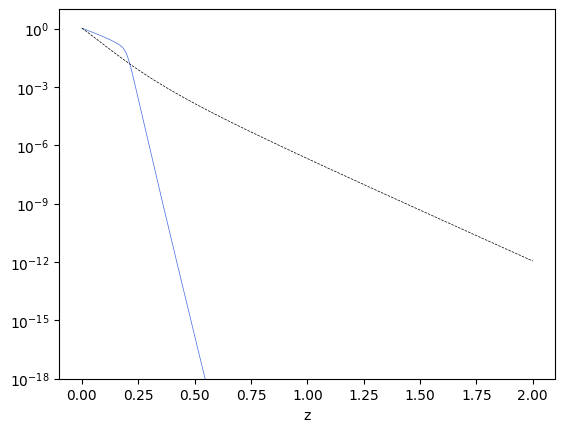

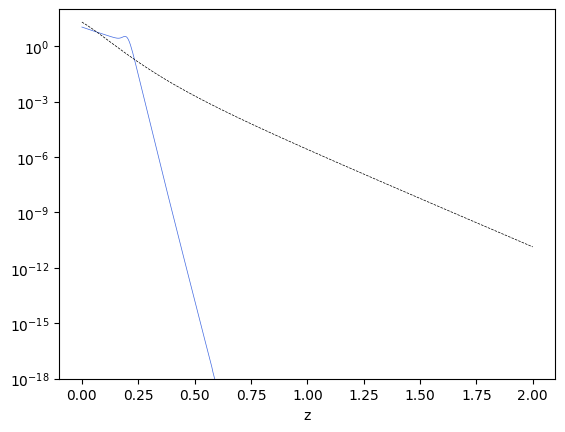

In [6]:
"""for ix in range(0, nresol_x, 20):
    for iy in range(0, nresol_y, 20):
        plt.plot(
            z_arr,
            abs(dpres_hyp[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.yscale("log")
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dphyp_mhs2.png"
# plt.savefig(plotname, dpi=300)
plt.show()


for ix in range(0, nresol_x, 20):
    for iy in range(0, nresol_y, 20):
        plt.plot(
            z_arr,
            abs(dpres_asymp[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.yscale("log")
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dphyp_mhs2.png"
# plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 20):
    for iy in range(0, nresol_y, 20):
        plt.plot(
            z_arr,
            abs(dpres_low[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.yscale("log")
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dphyp_mhs2.png"
# plt.savefig(plotname, dpi=300)
plt.show()"""

maxcoord = np.unravel_index(np.argmax(data_bz, axis=None), data_bz.shape)
iy = int(maxcoord[0])
ix = int(maxcoord[1])


"""plt.plot(
    z_arr,
    abs(dpres_hyp[iy, ix, :]),
    linewidth=0.5,
    color="tomato",
)"""
plt.plot(
    z_arr,
    abs(dpres_asymp[iy, ix, :]),
    linewidth=0.5,
    color="royalblue",
)
plt.plot(
    z_arr,
    abs(dpres_low[iy, ix, :]),
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.yscale("log")
plt.ylim([10**-18, 10**1 ])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dp_low_asymp.png"
plt.savefig(plotname, dpi=300)
plt.show()


"""plt.plot(
    z_arr,
    abs(dden_hyp[iy, ix, :]),
    linewidth=0.5,
    color="tomato",
)"""
plt.plot(
    z_arr,
    abs(dden_asymp[iy, ix, :]),
    linewidth=0.5,
    color="royalblue",
)
plt.plot(
    z_arr,
    abs(dden_low[iy, ix, :]),
    linewidth=0.5,
    color="black",
    linestyle="dashed", 
)
# plt.xlim([0, 2*z0])
plt.xlabel("z")
plt.yscale("log")
plt.ylim([10**-18, 10**2 ])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_low_asymp.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [7]:
iz_photo = 0
z_photo = 0.0

iz_z0half = int(nresol_z / 20.0)
z_z0half = z0 / 2.0

iz_z0 = int(nresol_z / 10.0)
z_z0 = z0

In [8]:
dpres_photo = np.zeros((nresol_y, nresol_x))
dden_photo = np.zeros((nresol_y, nresol_x))

dpres_z0half = np.zeros((nresol_y, nresol_x))
dden_z0half = np.zeros((nresol_y, nresol_x))

dpres_z0 = np.zeros((nresol_y, nresol_x))
dden_z0 = np.zeros((nresol_y, nresol_x))

dpres_z0_bhalf = np.zeros((nresol_y, nresol_x))
dden_z0_bhalf = np.zeros((nresol_y, nresol_x))

dpres_z0_b = np.zeros((nresol_y, nresol_x))
dden_z0_b = np.zeros((nresol_y, nresol_x))

dpres_photo_low = np.zeros((nresol_y, nresol_x))
dden_photo_low = np.zeros((nresol_y, nresol_x))

dpres_z0half_low = np.zeros((nresol_y, nresol_x))
dden_z0half_low = np.zeros((nresol_y, nresol_x))

dpres_z0_low = np.zeros((nresol_y, nresol_x))
dden_z0_low = np.zeros((nresol_y, nresol_x))

dpres_z0_bhalf_low = np.zeros((nresol_y, nresol_x))
dden_z0_bhalf_low = np.zeros((nresol_y, nresol_x))

dpres_z0_b_low = np.zeros((nresol_y, nresol_x))
dden_z0_b_low = np.zeros((nresol_y, nresol_x))

In [9]:
for ix in range(nresol_x):
    for iy in range(nresol_y):
        bz_photo = mfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 2]
        bzdotgradbz_photo = (
            dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 1]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 1]
            + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 0]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 0]
            + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 2]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_photo, 2]
        )
        dpres_photo[iy, ix] = deltapres(z_photo, z0_b, deltaz_b, a, b, bz_photo)
        dden_photo[iy, ix] = deltaden(
            z_photo, z0_b, deltaz_b, a, b, bz_photo, bzdotgradbz_photo
        )

        bz_z0half = mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 2]
        bzdotgradbz_z0half = (
            dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 1]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 1]
            + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 0]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 0]
            + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 2]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0half, 2]
        )
        dpres_z0half[iy, ix] = deltapres(z_z0half, z0_b, deltaz_b, a, b, bz_z0half)
        dden_z0half[iy, ix] = deltaden(
            z_z0half, z0_b, deltaz_b, a, b, bz_z0half, bzdotgradbz_z0half
        )

        bz_z0 = mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 2]
        bzdotgradbz_z0 = (
            dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 1]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 1]
            + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 0]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 0]
            + dmfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 2]
            * mfield_asymp[nresol_y + iy, nresol_x + ix, iz_z0, 2]
        )
        dpres_z0[iy, ix] = deltapres(z_z0, z0_b, deltaz_b, a, b, bz_z0)
        dden_z0[iy, ix] = deltaden(z_z0, z0_b, deltaz_b, a, b, bz_z0, bzdotgradbz_z0)

        bz_photo_low = mfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 2]
        bzdotgradbz_photo_low = (
            dmfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 1]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 1]
            + dmfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 0]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 0]
            + dmfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 2]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_photo, 2]
        )
        dpres_photo_low[iy, ix] = deltapres_low(z_photo, kappa, a_low, bz_photo_low)
        dden_photo_low[iy, ix] = deltaden_low(z_photo, kappa, a_low, bz_photo_low, bzdotgradbz_photo_low)

        bz_z0half_low = mfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 2]
        bzdotgradbz_z0half_low = (
            dmfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 1]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 1]
            + dmfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 0]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 0]
            + dmfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 2]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_z0half, 2]
        )
        dpres_z0half_low[iy, ix] = deltapres_low(z_z0half, kappa, a_low, bz_z0half_low)
        dden_z0half_low[iy, ix] = deltaden_low(z_z0half, kappa, a_low, bz_z0half_low, bzdotgradbz_z0half_low)

        bz_z0_low = mfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 2]
        bzdotgradbz_z0_low = (
            dmfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 1]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 1]
            + dmfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 0]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 0]
            + dmfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 2]
            * mfield_low[nresol_y + iy, nresol_x + ix, iz_z0, 2]
        )
        dpres_z0_low[iy, ix] = deltapres_low(z_z0, kappa, a_low, bz_z0_low)
        dden_z0_low[iy, ix] = deltaden_low(z_z0, kappa, a_low, bz_z0_low, bzdotgradbz_z0_low)

In [35]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow", "lightyellow"])

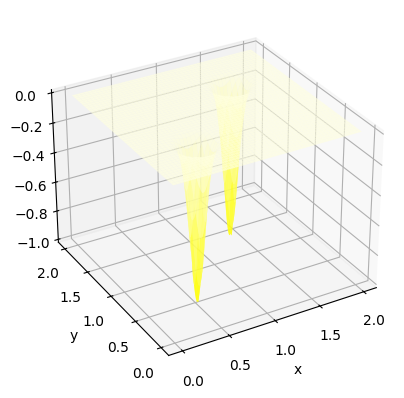

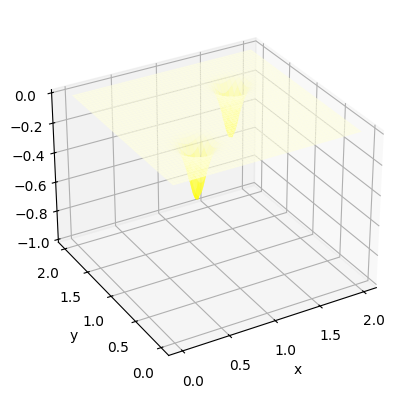

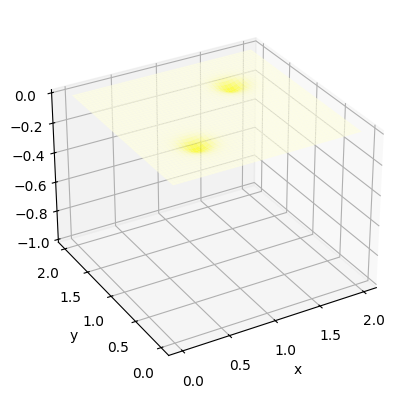

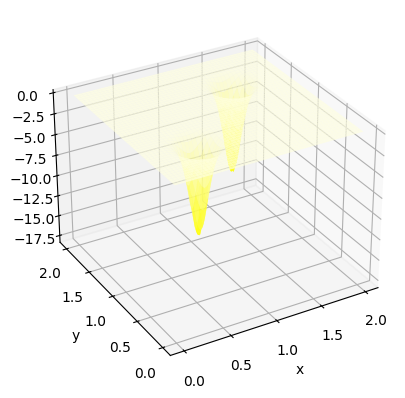

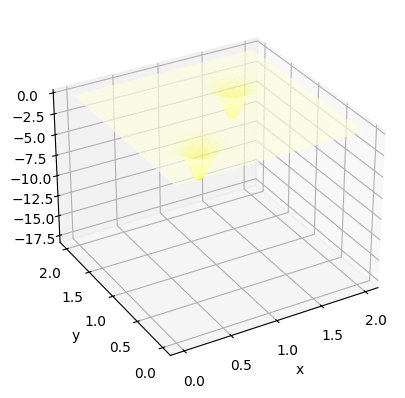

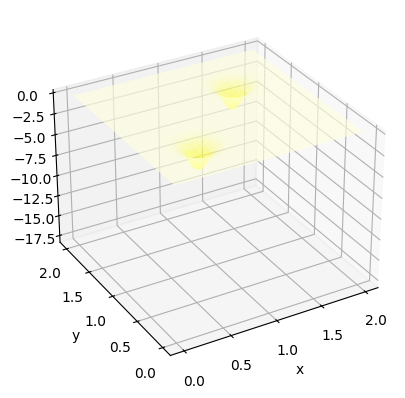

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dpres_photo, cmap=cmap, label="Delta p, z = " + str(z_photo), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-1.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_pd_surf_asymp_photo.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dpres_z0half, cmap=cmap, label="Delta p, z = " + str(z_z0half), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-1.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_pd_surf_asymp_z0half.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dpres_z0, cmap=cmap, label="Delta p, z = " + str(z_z0), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-1.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_pd_surf_asymp_z0.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dden_photo, cmap=cmap, label="Delta d, z = " + str(z_photo), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-18.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_surf_asymp_photo.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dden_z0half, cmap=cmap, label="Delta d, z = " + str(z_z0half), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-18.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_surf_asymp_z0half.png"
plt.savefig(plotname, dpi=300)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, dden_z0, cmap=cmap, label="Delta d, z = " + str(z_z0), alpha=0.7)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-18.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_surf_asymp_z0.png"
plt.savefig(plotname, dpi=300)
plt.show()


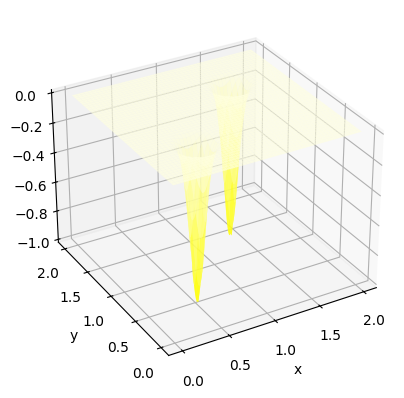

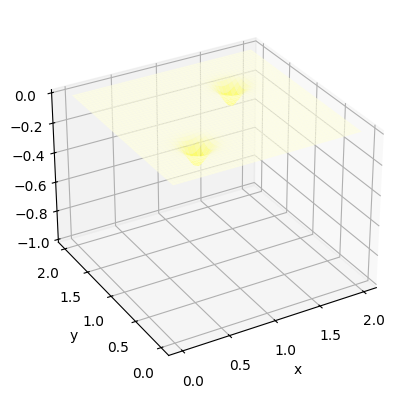

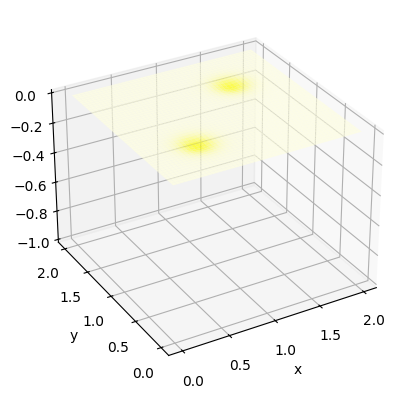

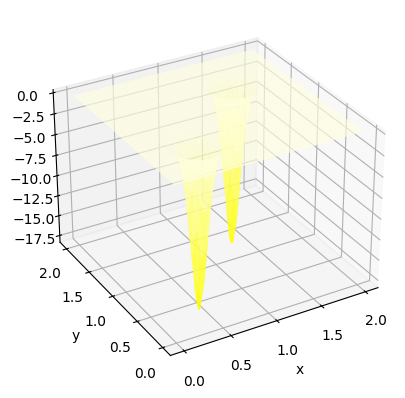

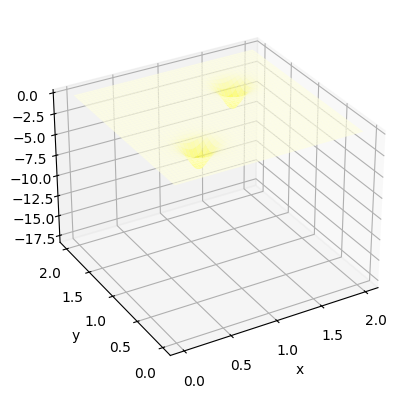

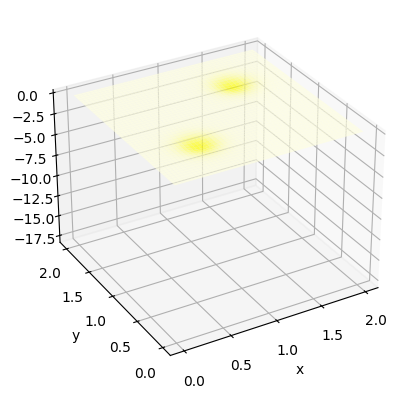

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dpres_photo_low, cmap=cmap, label="Delta p, z = " + str(z_photo), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-1.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_pd_surf_low_photo.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dpres_z0half_low, cmap=cmap, label="Delta p, z = " + str(z_z0half), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-1.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_pd_surf_low_z0half.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dpres_z0_low, cmap=cmap, label="Delta p, z = " + str(z_z0), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-1.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_pd_surf_low_z0.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dden_photo_low, cmap=cmap, label="Delta d, z = " + str(z_photo), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-18.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_surf_low_photo.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot, x_plot, dden_z0half_low, cmap=cmap, label="Delta d, z = " + str(z_z0half), alpha=0.7, 
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-18.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_surf_low_z0half.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, dden_z0_low, cmap=cmap, label="Delta d, z = " + str(z_z0), alpha=0.7)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, 240, 0)
ax.set_zlim([-18.0, 0.0])
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/solcomp_dd_surf_low_z0.png"
plt.savefig(plotname, dpi=300)
plt.show()